***Classification***

---



Treating the problem as a classification problem, using a decision tree to learn a classification model that predicts the number of persons that used a bicycle based on the available features and
use the learned model to identify the two most prominent features.

**Decision Tree Classifier**

In [ ]:
import sklearn.datasets as datasets    # import the needed packages.
import pandas as pd
import numpy as np
from sklearn import metrics

day = "/content/day.csv"   # import day.csv
df = pd.read_csv(day)
print(df)       # print the dataset.

     instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
0          1  2011-01-01       1   0  ...   0.160446     331         654   985
1          2  2011-01-02       1   0  ...   0.248539     131         670   801
2          3  2011-01-03       1   0  ...   0.248309     120        1229  1349
3          4  2011-01-04       1   0  ...   0.160296     108        1454  1562
4          5  2011-01-05       1   0  ...   0.186900      82        1518  1600
..       ...         ...     ...  ..  ...        ...     ...         ...   ...
726      727  2012-12-27       1   1  ...   0.350133     247        1867  2114
727      728  2012-12-28       1   1  ...   0.155471     644        2451  3095
728      729  2012-12-29       1   1  ...   0.124383     159        1182  1341
729      730  2012-12-30       1   1  ...   0.350754     364        1432  1796
730      731  2012-12-31       1   1  ...   0.154846     439        2290  2729

[731 rows x 16 columns]


In [ ]:
df.dtypes   # checking datatypes.

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
print(df.isnull().any())    # checking for null values.

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


In [ ]:
feature_cols = ['mnth', 'holiday', 'weekday', 'workingday','weathersit','temp', 'hum', 'windspeed']
X = df[feature_cols]      # features selected. Exclude columns 'instant','dteday','season','yr', 'atemp', 'casual', 'registered' from feature selection.
y = df['cnt']       # target variable
print(X,y)

     mnth  holiday  weekday  ...      temp       hum  windspeed
0       1        0        6  ...  0.344167  0.805833   0.160446
1       1        0        0  ...  0.363478  0.696087   0.248539
2       1        0        1  ...  0.196364  0.437273   0.248309
3       1        0        2  ...  0.200000  0.590435   0.160296
4       1        0        3  ...  0.226957  0.436957   0.186900
..    ...      ...      ...  ...       ...       ...        ...
726    12        0        4  ...  0.254167  0.652917   0.350133
727    12        0        5  ...  0.253333  0.590000   0.155471
728    12        0        6  ...  0.253333  0.752917   0.124383
729    12        0        0  ...  0.255833  0.483333   0.350754
730    12        0        1  ...  0.215833  0.577500   0.154846

[731 rows x 8 columns] 0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64


In [ ]:
y = pd.cut(df['cnt'],10, labels=['1','2','3','4','5','6','7','8','9','10']) # convert the values of the “cnt” feature into a set of categorical values.
print(y)

0      2
1      1
2      2
3      2
4      2
      ..
726    3
727    4
728    2
729    3
730    4
Name: cnt, Length: 731, dtype: category
Categories (10, object): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]


In [ ]:
from sklearn.model_selection import train_test_split   # splitting the dataset into train-test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.tree import DecisionTreeClassifier   # import the classifier.
dtree = DecisionTreeClassifier(max_depth=3)  # select max_depth 3 due to the fact that we have better accuracy.
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
feat_importance = dtree.tree_.compute_feature_importances(normalize=False)       # compute feature importance in order to identify the two most prominent features.
print("Feat importance = " + str(feat_importance))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))                   # compute accuracy.

Feat importance = [0.01500108 0.         0.         0.         0.00526088 0.06668588
 0.01313074 0.        ]
Accuracy: 0.3090909090909091


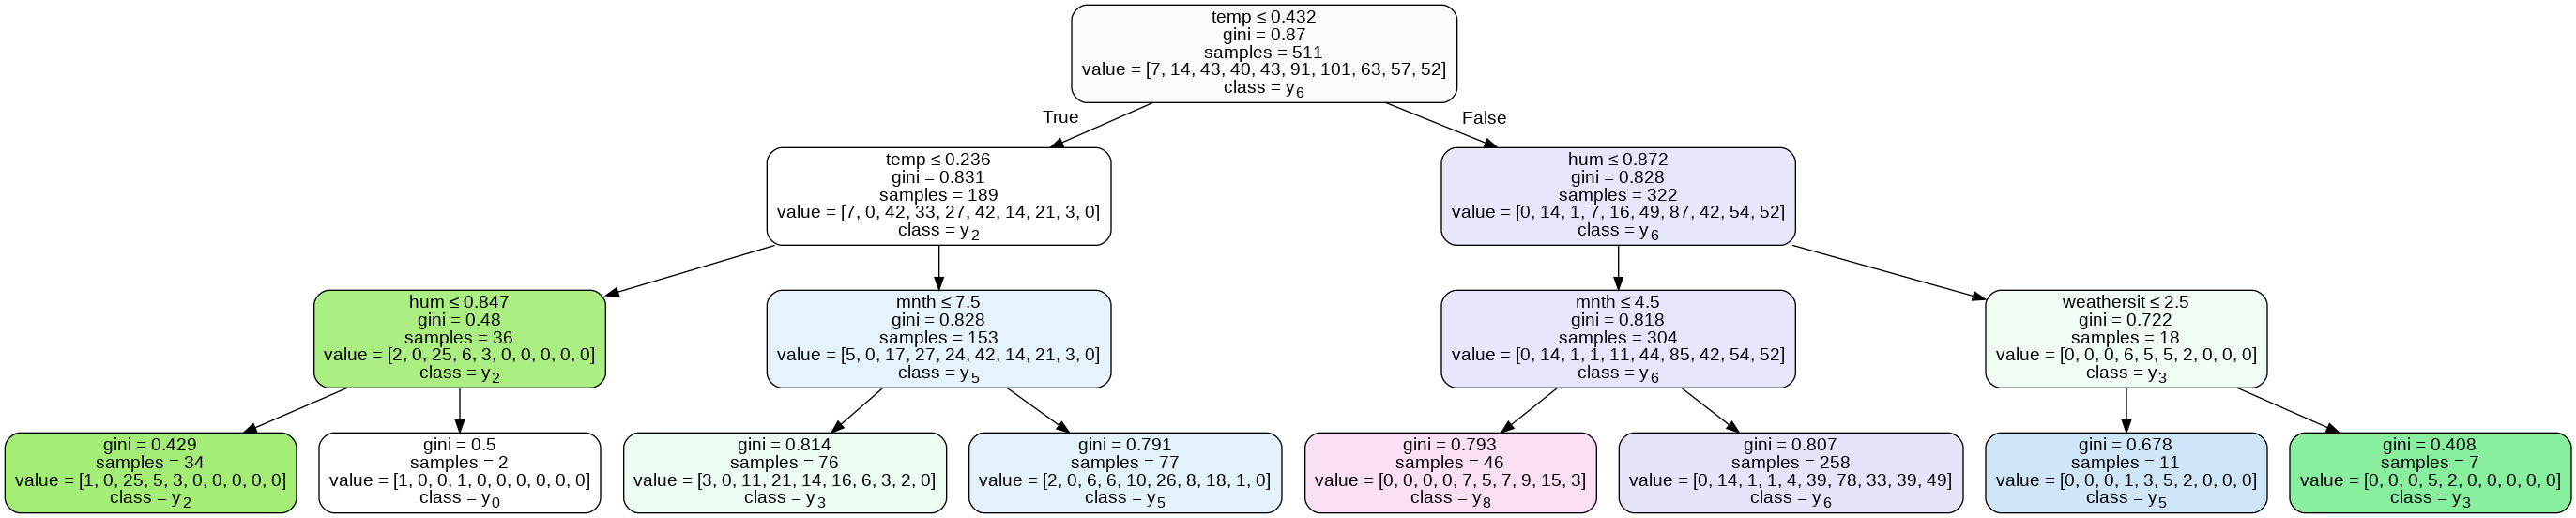

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image     # visualize tree.
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,         
                     feature_names=feature_cols,  
                     class_names=True,                         
                     filled=True, rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())    # plot tree.
graph.write_png('day.png')
Image(graph.create_png())